In [24]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import ast

In [52]:
def parse_history(path):
    with open(path) as file:
        # loss - acc - val_los - val_acc
        line = file.readline()
        line = file.readline()
        line = file.readline()
        val_loss = line.split(":")[-1].strip()
        val_loss = ast.literal_eval(val_loss)
        
        line = file.readline()
        val_acc = line.split(":")[-1].strip()
        val_acc = ast.literal_eval(val_acc)
        
        return val_loss, val_acc

In [53]:
exp_dir = "/home/henriklg/master-thesis/code/hyper-kvasir/experiments/image-size"

image_sizes = [32, 64, 128, 256]
acc_list = []
loss_list = []

for size in image_sizes:
    path = "{}/{}/teacher_history.txt".format(exp_dir, size)
    
    loss, acc = parse_history(path)
    loss_list.append(loss)
    acc_list.append(acc)
    
x = list(range(len(acc_list[1])))

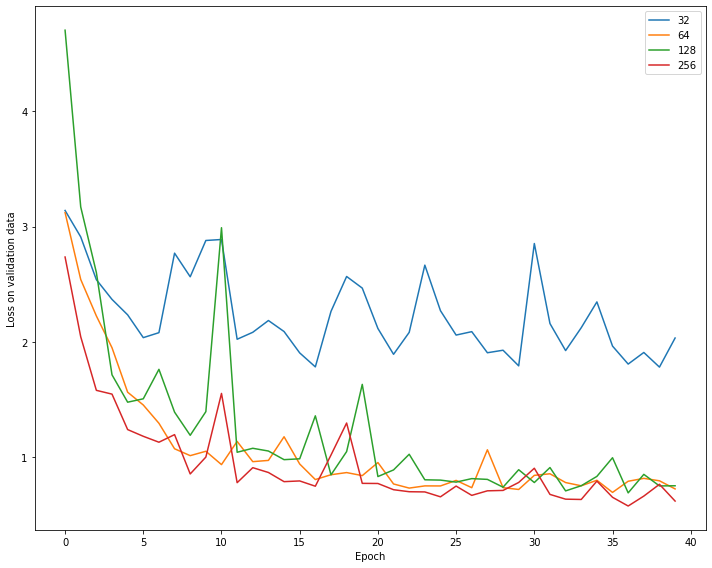

In [55]:
plt.figure(figsize=(10,8));
for img_size in loss_list:
    plt.plot(x,img_size)
plt.legend(image_sizes);
plt.xlabel("Epoch")
plt.ylabel("Loss on validation data");
plt.tight_layout()
plt.savefig("img_size_validation_loss.pdf", format="pdf")

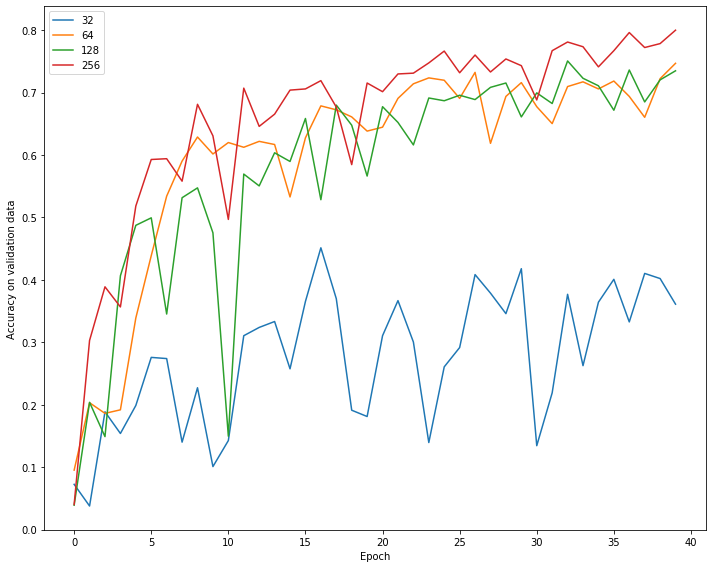

In [56]:
plt.figure(figsize=(10,8));
for img_size in acc_list:
    plt.plot(x,img_size)
plt.legend(image_sizes);
plt.xlabel("Epoch")
plt.ylabel("Accuracy on validation data");
plt.tight_layout()
plt.savefig("img_size_validation_acc.pdf", format="pdf")

In [57]:
import tensorflow as tf

In [65]:
def fn2img(path, size):
    """
    Used for reading unlab_ds images
    """
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [size, size])
    return img

In [66]:
img_path = "/home/henriklg/master-thesis/data/hyper-kvasir/labeled_ttv/train/ulcerative-colitis-grade-3/5e47f553-3909-448d-b6d2-09de59cfebf1.jpg"
images = []

for size in image_sizes:
    image = fn2img(img_path, size)
    images.append(image)

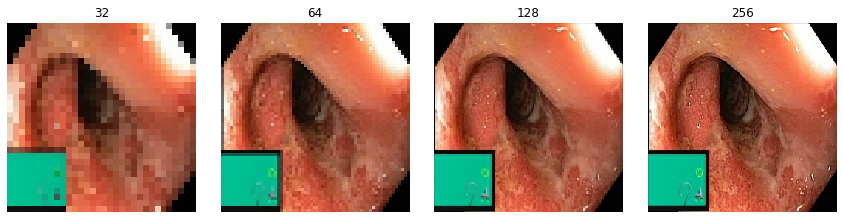

In [70]:
nrows, ncols = 1, 4  # array of sub-plots
figsize = [ncols*3, nrows*3]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                       figsize=figsize, frameon=False, facecolor='white')

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    rowid = i // ncols
    colid = i % ncols

    title = str(image_sizes[i])
    axi.set_title(title)
    img = images[i]

    axi.imshow(img)
    axi.set_axis_off()

plt.axis('off')
plt.tight_layout(True)
plt.savefig("image_resolutions", format='pdf')
plt.show()